# Module 02: A Box Model Carbon Assignment

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution.

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system.

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
p_emissions = Path('/content/drive/MyDrive/GEOS518_F24/AnthropogenicEmissions.1751_2008.csv')
emissions = pd.read_csv(p_emissions, engine='python')
# MIGHT NOT USE THIS PANDAS OBJECT OTHER THAN FOR PLOTTING

In [4]:
print(emissions)
# TEST STATEMENT

     Year  Anthropogenic emissions (GtC)
0    1751                          0.003
1    1752                          0.003
2    1753                          0.003
3    1754                          0.003
4    1755                          0.003
..    ...                            ...
253  2004                          7.782
254  2005                          8.086
255  2006                          8.350
256  2007                          8.543
257  2008                          8.749

[258 rows x 2 columns]


In [5]:
# PROBLEM A

# ADAPTED FROM CarbonModel1 NOTEBOOK
M1i = 1100.0
M2i = 300.0
# SET INITIAL MASS AMOUNTS OF CARBON IN EACH RESERVOIR (ATM AND BIO)

k12 = 0.0003
k21 = 0.1

#k12  = 0.0003
#k21 = 0.1
# SET COEFFICIENTS FOR THE RATE OF FLUX FROM 1 -> 2 AND 2 -> 1

ti = 0
tm = 100
tf = 2008
dt = 1/365
# TIME INITIAL, TIME FINAL, TIME STEP
# TM IS FOR 100 YEAR SIMULATION (PART 1a)

In [6]:
t = np.arange(ti,tm+dt,dt)
# CREATE ARRAY FOR SET OF CONSECUTIVE TIME STEPS

Nt = t.size

print('t has '+str(Nt)+' time steps')
print(t)

t has 36501 time steps
[0.00000000e+00 2.73972603e-03 5.47945205e-03 ... 9.99945205e+01
 9.99972603e+01 1.00000000e+02]


In [7]:
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))
# MAKE ARAYS TO REPRESENT THE VARYING MASSES IN RESERBOIRS 1&2 OVER TIME STEPS

#print(Nt)
#print(np.arange(Nt))
print(M1)
print(M2)
#print(t)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
for i in np.arange(Nt):
  # CREATE INDEX FOR 0 THRU 20
    if (i==0):

        M1[i] = M1i
        M2[i] = M2i
        # SET INITIAL MASS AMOUNTS ASSOCIATED W/ TIME STEP 0

    else:
      # f12 should depend on M1 (atm) and M2 (bio/land)
      # dm1/dt = f21 - f12
      # dm1/dt = f12 - f21
        dM1dt = k21*M2[i-1] - k12*M1[i-1] - k12*M2[i-1]
        dM2dt = k12*M1[i-1] + k12*M2[i-1] - k21*M2[i-1]
        # CALCULATE FLUX AMOUNTS ASSOC. W/ CURRENT TIME STEP

        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt
        # WHEN i > 0, ADD FLUX AMOUNTS TO M1 AND M2 BASED ON TIME STEP & K COEFFICIENTS


In [9]:
print(M1)
print(M2)

[1100.         1100.0810411  1100.16205999 ... 1395.78658174 1395.78658541
 1395.78658909]
[300.         299.9189589  299.83794001 ...   4.21341826   4.21341459
   4.21341091]


In [10]:
print('The final mass in M1 is ' + str(M1[-1]) + '\n')
print('The final mass in M1 is ' + str(M2[-1]))

The final mass in M1 is 1395.7865890878516

The final mass in M1 is 4.213410912161793


In [11]:
#historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
historical_emissions_file = '/content/drive/My Drive/GEOS518_F24/AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does:
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

year = data[:,0]
cflux = data[:,1]

cflux_t = np.interp(t, year, cflux)
# Read this documentation to understand what this command does:
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html


np.diff(M1)
# Read this documentation to understand what this command does:
#    https://numpy.org/doc/stable/reference/generated/numpy.diff.html

array([8.10410959e-02, 8.10188929e-02, 8.09966959e-02, ...,
       3.67724397e-06, 3.67623670e-06, 3.67522944e-06])

In [12]:
print(data)

[[1.751e+03 3.000e-03]
 [1.752e+03 3.000e-03]
 [1.753e+03 3.000e-03]
 [1.754e+03 3.000e-03]
 [1.755e+03 3.000e-03]
 [1.756e+03 3.000e-03]
 [1.757e+03 3.000e-03]
 [1.758e+03 3.000e-03]
 [1.759e+03 3.000e-03]
 [1.760e+03 3.000e-03]
 [1.761e+03 3.000e-03]
 [1.762e+03 3.000e-03]
 [1.763e+03 3.000e-03]
 [1.764e+03 3.000e-03]
 [1.765e+03 3.000e-03]
 [1.766e+03 3.000e-03]
 [1.767e+03 3.000e-03]
 [1.768e+03 3.000e-03]
 [1.769e+03 3.000e-03]
 [1.770e+03 3.000e-03]
 [1.771e+03 4.000e-03]
 [1.772e+03 4.000e-03]
 [1.773e+03 4.000e-03]
 [1.774e+03 4.000e-03]
 [1.775e+03 4.000e-03]
 [1.776e+03 4.000e-03]
 [1.777e+03 4.000e-03]
 [1.778e+03 4.000e-03]
 [1.779e+03 4.000e-03]
 [1.780e+03 4.000e-03]
 [1.781e+03 5.000e-03]
 [1.782e+03 5.000e-03]
 [1.783e+03 5.000e-03]
 [1.784e+03 5.000e-03]
 [1.785e+03 5.000e-03]
 [1.786e+03 5.000e-03]
 [1.787e+03 5.000e-03]
 [1.788e+03 5.000e-03]
 [1.789e+03 5.000e-03]
 [1.790e+03 5.000e-03]
 [1.791e+03 6.000e-03]
 [1.792e+03 6.000e-03]
 [1.793e+03 6.000e-03]
 [1.794e+03

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0
  * $M_2^0$ = 300.0
  * $k_{12}$ = 0.0003
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time
  * Mass of C in the land versus time
  * The change in mass of C in the atmosphere vs time
  * The change in mass of C in the biosphere vs time
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots:

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time
  * The change in mass of C in the biosphere vs time


In [13]:
future_emissions_file = '/content/drive/My Drive/GEOS518_F24/EmissionsMitigationScenarios.2008_2100.csv'

data2 = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data2[:,0]
cflux_nz2030 = data2[:,1]
cflux_nz2050 = data2[:,2]
cflux_zeg = data2[:,3]

In [14]:
# HISTORICAL FILE (REPEAT)
historical_emissions_file = '/content/drive/My Drive/GEOS518_F24/AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)

In [15]:
print(data2)

[[2.008e+03 8.749e+00 8.749e+00 8.749e+00]
 [2.009e+03 8.351e+00 8.541e+00 8.749e+00]
 [2.010e+03 7.953e+00 8.333e+00 8.749e+00]
 [2.011e+03 7.555e+00 8.125e+00 8.749e+00]
 [2.012e+03 7.157e+00 7.917e+00 8.749e+00]
 [2.013e+03 6.759e+00 7.709e+00 8.749e+00]
 [2.014e+03 6.361e+00 7.501e+00 8.749e+00]
 [2.015e+03 5.963e+00 7.293e+00 8.749e+00]
 [2.016e+03 5.565e+00 7.085e+00 8.749e+00]
 [2.017e+03 5.167e+00 6.877e+00 8.749e+00]
 [2.018e+03 4.769e+00 6.669e+00 8.749e+00]
 [2.019e+03 4.371e+00 6.461e+00 8.749e+00]
 [2.020e+03 3.973e+00 6.253e+00 8.749e+00]
 [2.021e+03 3.575e+00 6.045e+00 8.749e+00]
 [2.022e+03 3.177e+00 5.837e+00 8.749e+00]
 [2.023e+03 2.779e+00 5.629e+00 8.749e+00]
 [2.024e+03 2.381e+00 5.421e+00 8.749e+00]
 [2.025e+03 1.983e+00 5.213e+00 8.749e+00]
 [2.026e+03 1.585e+00 5.005e+00 8.749e+00]
 [2.027e+03 1.187e+00 4.797e+00 8.749e+00]
 [2.028e+03 7.890e-01 4.589e+00 8.749e+00]
 [2.029e+03 3.910e-01 4.381e+00 8.749e+00]
 [2.030e+03 0.000e+00 4.173e+00 8.749e+00]
 [2.031e+03

In [16]:
print(data)

[[1.751e+03 3.000e-03]
 [1.752e+03 3.000e-03]
 [1.753e+03 3.000e-03]
 [1.754e+03 3.000e-03]
 [1.755e+03 3.000e-03]
 [1.756e+03 3.000e-03]
 [1.757e+03 3.000e-03]
 [1.758e+03 3.000e-03]
 [1.759e+03 3.000e-03]
 [1.760e+03 3.000e-03]
 [1.761e+03 3.000e-03]
 [1.762e+03 3.000e-03]
 [1.763e+03 3.000e-03]
 [1.764e+03 3.000e-03]
 [1.765e+03 3.000e-03]
 [1.766e+03 3.000e-03]
 [1.767e+03 3.000e-03]
 [1.768e+03 3.000e-03]
 [1.769e+03 3.000e-03]
 [1.770e+03 3.000e-03]
 [1.771e+03 4.000e-03]
 [1.772e+03 4.000e-03]
 [1.773e+03 4.000e-03]
 [1.774e+03 4.000e-03]
 [1.775e+03 4.000e-03]
 [1.776e+03 4.000e-03]
 [1.777e+03 4.000e-03]
 [1.778e+03 4.000e-03]
 [1.779e+03 4.000e-03]
 [1.780e+03 4.000e-03]
 [1.781e+03 5.000e-03]
 [1.782e+03 5.000e-03]
 [1.783e+03 5.000e-03]
 [1.784e+03 5.000e-03]
 [1.785e+03 5.000e-03]
 [1.786e+03 5.000e-03]
 [1.787e+03 5.000e-03]
 [1.788e+03 5.000e-03]
 [1.789e+03 5.000e-03]
 [1.790e+03 5.000e-03]
 [1.791e+03 6.000e-03]
 [1.792e+03 6.000e-03]
 [1.793e+03 6.000e-03]
 [1.794e+03

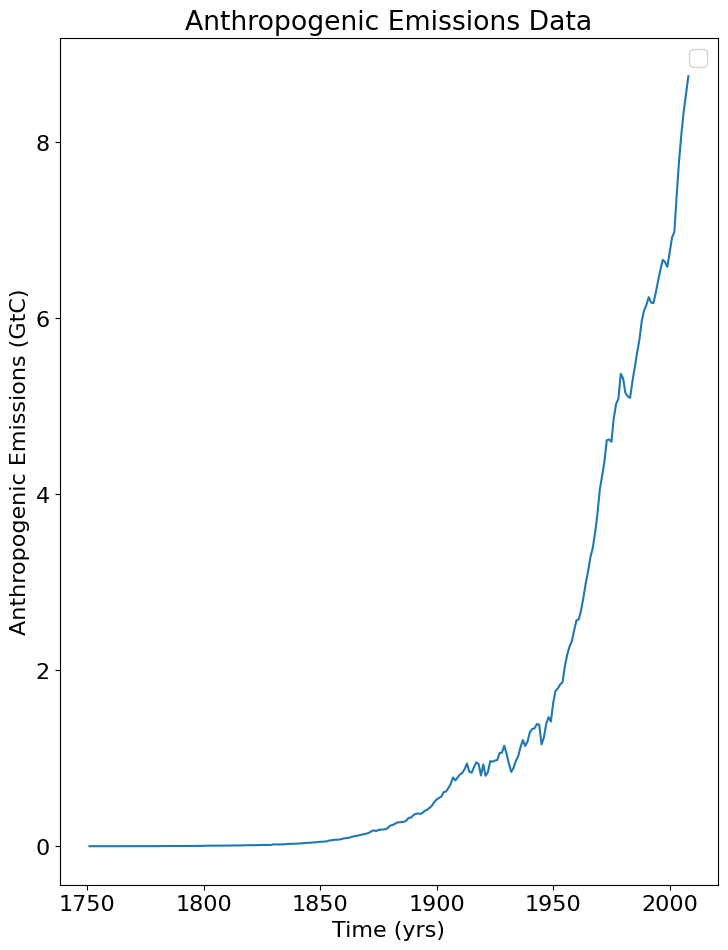

In [17]:
# PROBLEM B

# FIRST : PLOTTING ANTHROPOGENIC EMISSIONS
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.title('Anthropogenic Emissions Data')
plt.plot(emissions['Year'], emissions['Anthropogenic emissions (GtC)'])
plt.xlabel('Time (yrs)')
plt.ylabel('Anthropogenic Emissions (GtC)')
plt.legend()

plt.show()

In [18]:
# ADAPTED FROM CarbonModel1 NOTEBOOK
M1i = 1395.7865
M2i = 4.2134
# SET INITIAL MASS AMOUNTS OF CARBON IN EACH RESERVOIR (ATM AND BIO)

k12 = 0.0003
k21 = 0.1
# SET COEFFICIENTS FOR THE RATE OF FLUX FROM 1 -> 2 AND 2 -> 1

ti = 1751
# tm = 1851
tf = 2008
dt = 1
# TIME INITIAL, TIME FINAL, TIME STEP

In [19]:
t = np.arange(ti,tf+dt,dt)
# CREATE ARRAY FOR SET OF CONSECUTIVE TIME STEPS

Nt = t.size

print('t has '+str(Nt)+' time steps')
print(t)

t has 258 time steps
[1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764
 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778
 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792
 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806
 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820
 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834
 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848
 1849 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862
 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876
 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890
 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932
 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 

In [20]:
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))
# MAKE ARAYS TO REPRESENT THE VARYING MASSES IN RESERBOIRS 1&2 OVER TIME STEPS
print(M1)
print(M2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [21]:
for i in np.arange(Nt):
  # CREATE INDEX FOR 0 THRU 20
    if (i==0):

        M1[i] = M1i
        M2[i] = M2i
        # SET INITIAL MASS AMOUNTS ASSOCIATED W/ TIME STEP 0

    else:
      # f12 should depend on M1 (atm) and M2 (bio/land)
      # dm1/dt = f21 - f12
      # dm1/dt = f12 - f21
        dM1dt = k21*M2[i-1] + data[i-1][1] - k12*M1[i-1] - k12*M2[i-1]
        dM2dt = k12*M1[i-1] + k12*M2[i-1] - k21*M2[i-1]
        # CALCULATE FLUX AMOUNTS ASSOC. W/ CURRENT TIME STEP

        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt
        # WHEN i > 0, ADD FLUX AMOUNTS TO M1 AND M2 BASED ON TIME STEP & K COEFFICIENTS

# + data[i-1][1]

In [22]:
print('The final mass in M1 is ' + str(M1[-1]))
print('The final mass in M2 is ' + str(M2[-1]))

The final mass in M1 is 1733.0042853623795
The final mass in M2 is 5.004614637621629


In [23]:
dM1 = np.diff(M1)
dM2 = np.diff(M2)

In [24]:
tdiff = np.delete(t, 0)
print(tdiff)

[1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765
 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779
 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792 1793
 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806 1807
 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821
 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835
 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849
 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 

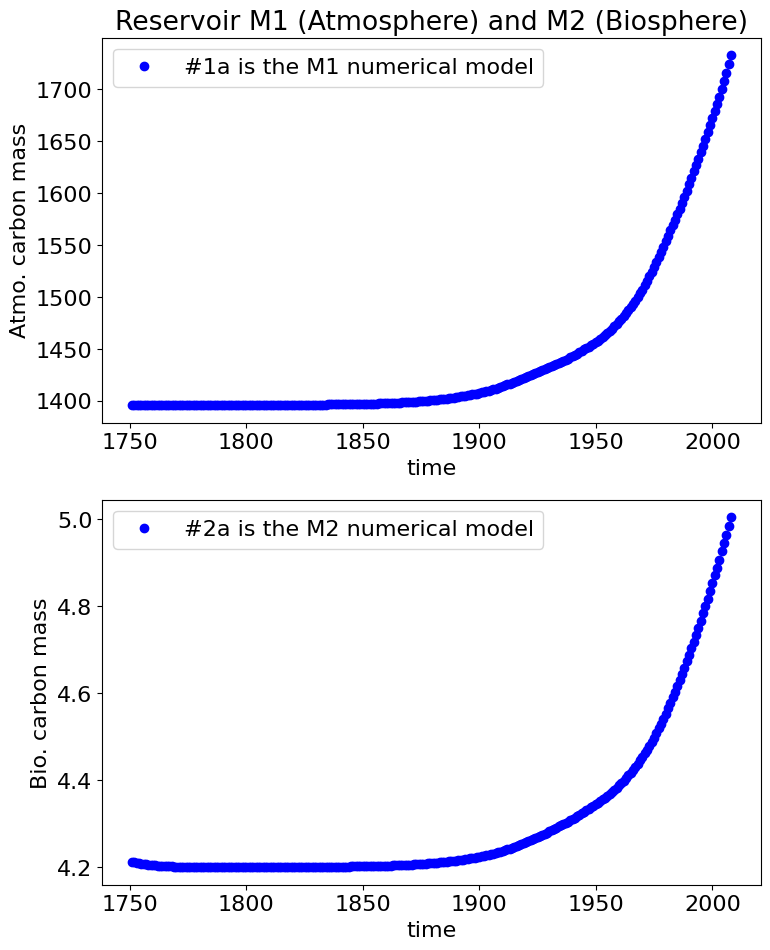

In [25]:
# PLOT THESE TINGS (B)

# Mass of C in the atmosphere versus time
# Mass of C in the land versus time
# The change in mass of C in the atmosphere vs time
# The change in mass of C in the biosphere vs time

# PLOTS OF RESERVOIR MASS BY YEAR
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.title('Reservoir M1 (Atmosphere) and M2 (Biosphere)')
plt.plot(t,M1,'bo', label='#1a is the M1 numerical model')
#plt.plot(t,M1_anlt,'k-', label=' #1b is the M1 analytical soln')
plt.xlabel('time')
plt.ylabel('Atmo. carbon mass')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='#2a is the M2 numerical model')
#plt.plot(t,M2_anlt,'k-', label='#2b is the M2 analytical soln')
plt.xlabel('time')
plt.ylabel('Bio. carbon mass')
plt.legend()

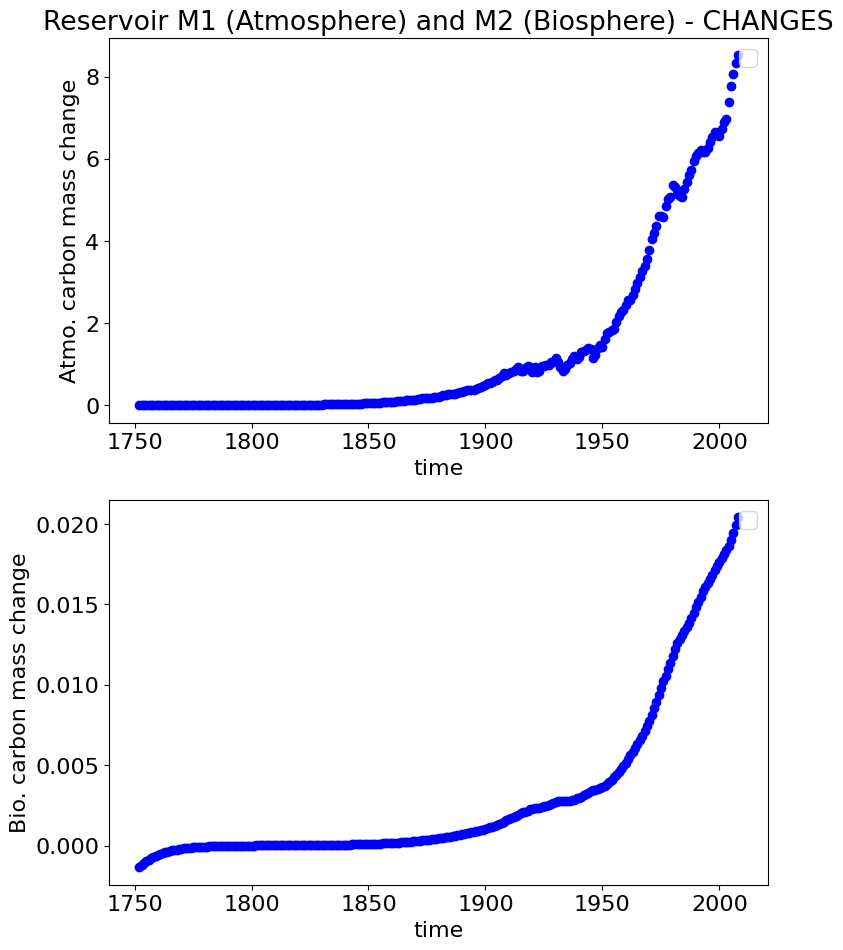

In [26]:
# PLOTS OF RESERVOIR MASS CHANGES BY YEAR
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.title('Reservoir M1 (Atmosphere) and M2 (Biosphere) - CHANGES')
plt.plot(tdiff,dM1,'bo')
#plt.plot(t,M1_anlt,'k-', label=' #1b is the M1 analytical soln')
plt.xlabel('time')
plt.ylabel('Atmo. carbon mass change')
plt.legend()

plt.subplot(2,1,2)
plt.plot(tdiff,dM2,'bo')
#plt.plot(t,M2_anlt,'k-', label='#2b is the M2 analytical soln')
plt.xlabel('time')
plt.ylabel('Bio. carbon mass change')
plt.legend()

In [28]:
# PROBLEM C (FILE IS "data2")

future_emissions_file = '/content/drive/My Drive/GEOS518_F24/EmissionsMitigationScenarios.2008_2100.csv'

data2 = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data2[:,0]

cflux_nz2030 = data2[:,1] # CHANGE THESE TO data2 ?
cflux_nz2050 = data2[:,2]
cflux_zeg = data2[:,3]

In [29]:
print(data2[:,0])

[2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020. 2021. 2022. 2023. 2024. 2025. 2026. 2027. 2028. 2029. 2030. 2031.
 2032. 2033. 2034. 2035. 2036. 2037. 2038. 2039. 2040. 2041. 2042. 2043.
 2044. 2045. 2046. 2047. 2048. 2049. 2050. 2051. 2052. 2053. 2054. 2055.
 2056. 2057. 2058. 2059. 2060. 2061. 2062. 2063. 2064. 2065. 2066. 2067.
 2068. 2069. 2070. 2071. 2072. 2073. 2074. 2075. 2076. 2077. 2078. 2079.
 2080. 2081. 2082. 2083. 2084. 2085. 2086. 2087. 2088. 2089. 2090. 2091.
 2092. 2093. 2094. 2095. 2096. 2097. 2098. 2099. 2100.]


In [30]:
# NEED TO PLOT :
# Mass of C in the atmosphere versus time (all three scenarios on one plot)
# Mass of C in the land versus time (all three scenarios on one plot)
# The change in mass of C in the atmosphere vs time
# The change in mass of C in the biosphere vs time

In [31]:
# SETTING UP SIMULATION FOR PART C
# INITIAL CONDITIONS :
# The final mass in M1 is 1733.0042853623795
# The final mass in M2 is 5.004614637621629

# ADAPTED FROM CarbonModel1 NOTEBOOK
M1i = 1733.0043
M2i = 5.0046
# SET INITIAL MASS AMOUNTS OF CARBON IN EACH RESERVOIR (ATM AND BIO)

k12 = 0.0003
k21 = 0.1
# SET COEFFICIENTS FOR THE RATE OF FLUX FROM 1 -> 2 AND 2 -> 1

ti = 2008
# tm = 1851
tf = 2100
dt = 1
# TIME INITIAL, TIME FINAL, TIME STEP

In [32]:
t = np.arange(ti,tf+dt,dt)
# CREATE ARRAY FOR SET OF CONSECUTIVE TIME STEPS

Nt = t.size

print('t has '+str(Nt)+' time steps')
print(t)

t has 93 time steps
[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099 2100]


In [39]:
M1_2030 = np.zeros((Nt,))
M2_2030 = np.zeros((Nt,))
M1_2050 = np.zeros((Nt,))
M2_2050 = np.zeros((Nt,))
M1_zeg = np.zeros((Nt,))
M2_zeg = np.zeros((Nt,))
# MAKE ARRAYS TO REPRESENT THE VARYING MASSES IN RESERVOIRS 1&2 OVER TIME STEPS

# TEST STATEMENTS :
print(M1_2030)
print(M2_2030)
print(M1_2050)
print(M2_2050)
print(M1_zeg)
print(M2_zeg)
#print(t)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

In [40]:
for i in np.arange(Nt):
  # CREATE INDEX FOR 0 THRU 20
    if (i==0):

        M1_2030[i] = M1i
        M2_2030[i] = M2i
        M1_2050[i] = M1i
        M2_2050[i] = M2i
        M1_zeg[i] = M1i
        M2_zeg[i] = M2i

        # SET INITIAL MASS AMOUNTS ASSOCIATED W/ TIME STEP 0

    else:
      # f12 should depend on M1 (atm) and M2 (bio/land)
      # dm1/dt = f21 - f12
      # dm1/dt = f12 - f21
        dM1dt30 = k21* M2_2030[i-1] + cflux_nz2030[i-1] - k12* M1_2030[i-1] - k12* M2_2030[i-1]
        dM2dt30 = k12* M1_2030[i-1] + k12* M2_2030[i-1] - k21* M2_2030[i-1]
        dM1dt50 = k21* M2_2050[i-1] + cflux_nz2050[i-1] - k12* M1_2050[i-1] - k12* M2_2050[i-1]
        dM2dt50 = k12* M1_2050[i-1] + k12* M2_2050[i-1] - k21* M2_2050[i-1]
        dM1dtz = k21* M2_zeg[i-1] + cflux_zeg[i-1] - k12* M1_zeg[i-1] - k12* M2_2030[i-1]
        dM2dtz = k12* M1_zeg[i-1] + k12* M2_zeg[i-1] - k21* M2_zeg[i-1]
        # CALCULATE FLUX AMOUNTS ASSOC. W/ CURRENT TIME STEP

        M1_2030[i] = M1_2030[i-1] + dM1dt30*dt
        M2_2030[i] = M2_2030[i-1] + dM2dt30*dt
        M1_2050[i] = M1_2050[i-1] + dM1dt50*dt
        M2_2050[i] = M2_2050[i-1] + dM2dt50*dt
        M1_zeg[i] = M1_zeg[i-1] + dM1dtz*dt
        M2_zeg[i] = M2_zeg[i-1] + dM2dtz*dt
        # WHEN i > 0, ADD FLUX AMOUNTS TO M1 AND M2 BASED ON TIME STEP & K COEFFICIENTS


In [41]:
print('Atmosphere Reservoir: 2030 scenario')
print(' \n ')
print(M1_2030)
print(' \n ')
print('Biosphere Reservoir: 2030 scenario')
print(' \n ')
print(M2_2030)
print(' \n ')
print(' \n ')
print('Atmosphere Reservoir: 2050 scenario')
print(' \n ')
print(M1_2050)
print(' \n ')
print('Biosphere Reservoir: 2050 scenario')
print(' \n ')
print(M2_2050)
print(' \n ')
print(' \n ')
print('Atmosphere Reservoir: Keeping 2008 Emissions scenario')
print(' \n ')
print(M1_zeg)
print(' \n ')
print('Biosphere Reservoir:Keeping 2008 Emissions scenario')
print(' \n ')
print(M2_zeg)
print(' \n ')
print(' \n ')

Atmosphere Reservoir: 2030 scenario
 
 
[1733.0043     1741.73235733 1750.06188423 1757.99305313 1765.52601925
 1772.66092226 1779.39788786 1785.7370292  1791.67844811 1797.22223623
 1802.36847604 1807.11724177 1811.46860022 1815.42261153 1818.9793298
 1822.13880375 1824.90107721 1827.26618962 1829.23417649 1830.80506977
 1831.97889822 1832.75568773 1833.13546159 1833.12524076 1833.11604201
 1833.10776314 1833.10031216 1833.09360627 1833.08757097 1833.08213921
 1833.07725062 1833.07285088 1833.06889113 1833.06532734 1833.06211994
 1833.05923327 1833.05663528 1833.05429708 1833.0521927  1833.05029876
 1833.04859422 1833.04706012 1833.04567944 1833.04443683 1833.04331847
 1833.04231196 1833.04140609 1833.04059081 1833.03985706 1833.03919668
 1833.03860235 1833.03806744 1833.03758603 1833.03715275 1833.03676281
 1833.03641186 1833.036096   1833.03581173 1833.03555589 1833.03532563
 1833.0351184  1833.03493189 1833.03476403 1833.03461296 1833.03447699
 1833.03435462 1833.03424449 1833.0341

In [42]:
print('The final mass in M1 (2030) is ' + str(M1_2030[-1]) + '\n')
print('The final mass in M2 (2030) is ' + str(M2_2030[-1]))
print(' \n ')
print('The final mass in M1 (2050) is ' + str(M1_2050[-1]) + '\n')
print('The final mass in M2 (2050) is ' + str(M2_2050[-1]))
print(' \n ')
print('The final mass in M1 (2008 Emissions) is ' + str(M1_zeg[-1]) + '\n')
print('The final mass in M2 (2008 Emissions) is ' + str(M2_zeg[-1]))
print(' \n ')

The final mass in M1 (2030) is 1833.0333173415388

The final mass in M2 (2030) is 5.515582658460357
 
 
The final mass in M1 (2050) is 1920.6000797822721

The final mass in M2 (2050) is 5.77882021772793
 
 
The final mass in M1 (2008 Emissions) is 2535.5703787643974

The final mass in M2 (2008 Emissions) is 7.366329096404696
 
 


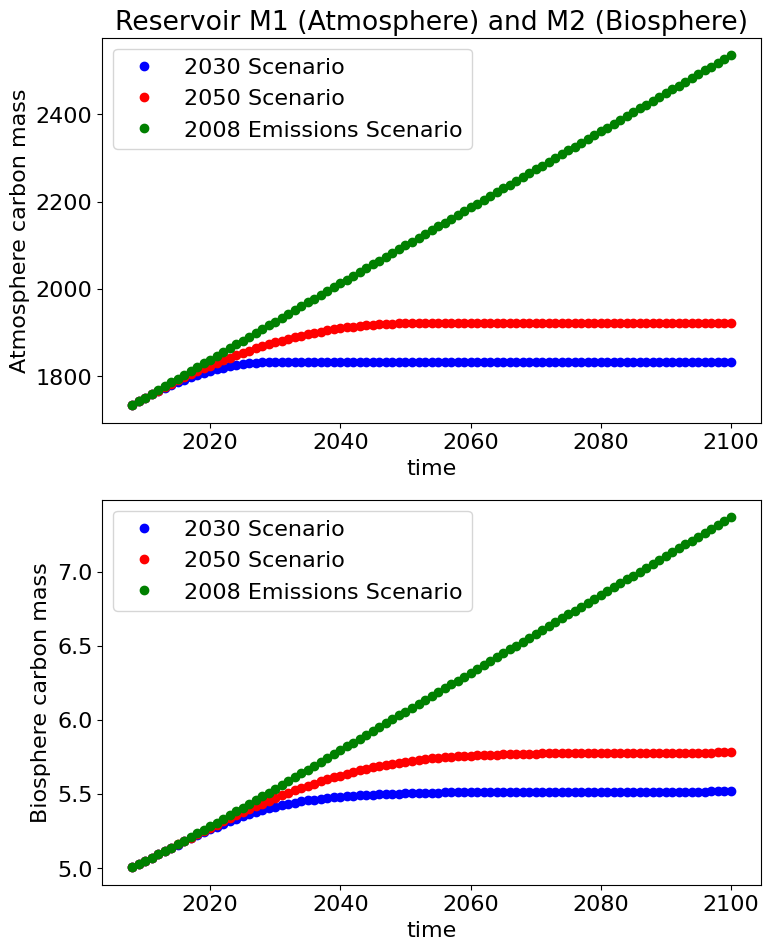

In [43]:
# NEED TO PLOT :
# Mass of C in the atmosphere versus time (all three scenarios on one plot)
# Mass of C in the land versus time (all three scenarios on one plot)
# The change in mass of C in the atmosphere vs time
# The change in mass of C in the biosphere vs time

# PLOTS OF RESERVOIR MASS BY YEAR
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.title('Reservoir M1 (Atmosphere) and M2 (Biosphere)')
plt.plot(t,M1_2030,'bo', label='2030 Scenario')
plt.plot(t,M1_2050,'ro', label='2050 Scenario')
plt.plot(t,M1_zeg,'go', label='2008 Emissions Scenario')
#plt.plot(t,M1_anlt,'k-', label=' #1b is the M1 analytical soln')
plt.xlabel('time')
plt.ylabel('Atmosphere carbon mass')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2_2030,'bo', label='2030 Scenario')
plt.plot(t,M2_2050,'ro', label='2050 Scenario')
plt.plot(t,M2_zeg,'go', label='2008 Emissions Scenario')
#plt.plot(t,M2_anlt,'k-', label='#2b is the M2 analytical soln')
plt.xlabel('time')
plt.ylabel('Biosphere carbon mass')
plt.legend()

In [48]:
print(M1_2030)

[1733.0043     1741.73235733 1750.06188423 1757.99305313 1765.52601925
 1772.66092226 1779.39788786 1785.7370292  1791.67844811 1797.22223623
 1802.36847604 1807.11724177 1811.46860022 1815.42261153 1818.9793298
 1822.13880375 1824.90107721 1827.26618962 1829.23417649 1830.80506977
 1831.97889822 1832.75568773 1833.13546159 1833.12524076 1833.11604201
 1833.10776314 1833.10031216 1833.09360627 1833.08757097 1833.08213921
 1833.07725062 1833.07285088 1833.06889113 1833.06532734 1833.06211994
 1833.05923327 1833.05663528 1833.05429708 1833.0521927  1833.05029876
 1833.04859422 1833.04706012 1833.04567944 1833.04443683 1833.04331847
 1833.04231196 1833.04140609 1833.04059081 1833.03985706 1833.03919668
 1833.03860235 1833.03806744 1833.03758603 1833.03715275 1833.03676281
 1833.03641186 1833.036096   1833.03581173 1833.03555589 1833.03532563
 1833.0351184  1833.03493189 1833.03476403 1833.03461296 1833.03447699
 1833.03435462 1833.03424449 1833.03414537 1833.03405616 1833.03397588
 1833.0

In [50]:
# CHANGE
dM1 = np.diff(M1)
dM2 = np.diff(M2)

dM1_30 = np.diff(M1_2030)
dM2_30 = np.diff(M2_2030)

dM1_50 = np.diff(M1_2050)
dM2_50 = np.diff(M2_2050)

dM1z = np.diff(M1_zeg)
dM2z = np.diff(M2_zeg)

In [57]:
print(dM1z)

[8.72805733 8.7275269  8.72704951 8.72661989 8.72623331 8.72588549
 8.7255726  8.72529118 8.72503811 8.7248106  8.72460613 8.72442243
 8.72425746 8.72410937 8.72397653 8.72385743 8.72375075 8.72365526
 8.7235699  8.72349369 8.72342574 8.72336526 8.72331155 8.72326396
 8.72322191 8.72318485 8.72315229 8.72312377 8.72309888 8.72307727
 8.72305861 8.7230426  8.72302897 8.7230175  8.72300795 8.72300015
 8.72299391 8.72298908 8.72298552 8.7229831  8.72298171 8.72298124
 8.7229816  8.72298272 8.7229845  8.7229869  8.72298984 8.72299327
 8.72299714 8.72300141 8.72300604 8.72301099 8.72301623 8.72302173
 8.72302747 8.72303342 8.72303955 8.72304586 8.72305233 8.72305893
 8.72306566 8.7230725  8.72307944 8.72308647 8.72309358 8.72310077
 8.72310802 8.72311534 8.72312271 8.72313012 8.72313758 8.72314508
 8.72315261 8.72316018 8.72316777 8.72317539 8.72318303 8.7231907
 8.72319838 8.72320608 8.72321379 8.72322152 8.72322926 8.72323701
 8.72324477 8.72325254 8.72326032 8.72326811 8.7232759  8.72328

In [45]:
# ONLY RUN ONCE
tdiff = np.delete(t, 0)
print(tdiff)

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036
 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050
 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078
 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092
 2093 2094 2095 2096 2097 2098 2099 2100]


TypeError: 'int' object is not callable

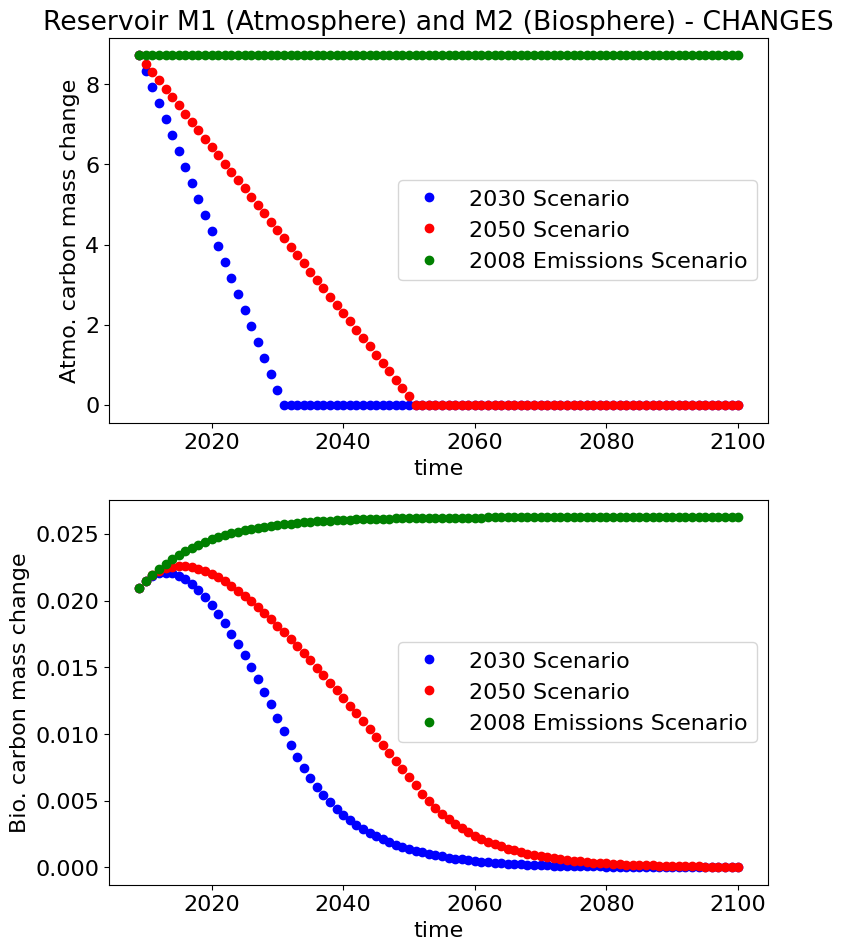

In [56]:
# CHANGE
# PLOTS OF RESERVOIR MASS CHANGES BY YEAR
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})

plt.subplot(2,1,1)
plt.title('Reservoir M1 (Atmosphere) and M2 (Biosphere) - CHANGES')
plt.plot(tdiff,dM1_30, 'bo',  label='2030 Scenario')
plt.plot(tdiff,dM1_50,'ro',  label='2050 Scenario')
plt.plot(tdiff,dM1z,'go',  label='2008 Emissions Scenario')
#plt.plot(t,M1_anlt,'k-', label=' #1b is the M1 analytical soln')
plt.xlabel('time')
plt.ylabel('Atmo. carbon mass change')
plt.legend()

plt.subplot(2,1,2)
plt.plot(tdiff,dM2_30, 'bo',  label='2030 Scenario')
plt.plot(tdiff,dM2_50,'ro',  label='2050 Scenario')
plt.plot(tdiff,dM2z,'go',  label='2008 Emissions Scenario')
#plt.plot(t,M2_anlt,'k-', label='#2b is the M2 analytical soln')
plt.xlabel('time')
plt.ylabel('Bio. carbon mass change')
plt.legend()